In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


In [21]:
df = pd.read_csv("/home/kkyu/amr_ws/DL/IoT_Project/environment_test.csv")
df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
0,2024-03-09 21:24:14,23.8,24.0,144,41.66
1,2024-03-09 21:24:16,23.8,24.0,144,41.66
2,2024-03-09 21:24:18,23.8,24.0,145,32.86
3,2024-03-09 21:24:19,23.8,24.0,146,27.98
4,2024-03-09 21:24:21,23.8,24.0,144,28.95


In [22]:
# 'AQI' 컬럼 생성
df['AQI'] = 0

# for loop를 사용하여 각 행에 대한 AQI 값 계산 및 할당
for index, row in df.iterrows():
    PM_10_value = row['PM-10 (μg/m3)']
    AQI_value = ((100 - 51) / (80 - 31)) * (PM_10_value - 31) + 51
    df.at[index, 'AQI'] = AQI_value

df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI
0,2024-03-09 21:24:14,23.8,24.0,144,41.66,61.66
1,2024-03-09 21:24:16,23.8,24.0,144,41.66,61.66
2,2024-03-09 21:24:18,23.8,24.0,145,32.86,52.86
3,2024-03-09 21:24:19,23.8,24.0,146,27.98,47.98
4,2024-03-09 21:24:21,23.8,24.0,144,28.95,48.95


In [23]:
# 'AQI_Bucket' 컬럼 생성 및 값 할당
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=[0, 50, 100, 250, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])

df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
0,2024-03-09 21:24:14,23.8,24.0,144,41.66,61.66,Moderate
1,2024-03-09 21:24:16,23.8,24.0,144,41.66,61.66,Moderate
2,2024-03-09 21:24:18,23.8,24.0,145,32.86,52.86,Moderate
3,2024-03-09 21:24:19,23.8,24.0,146,27.98,47.98,Good
4,2024-03-09 21:24:21,23.8,24.0,144,28.95,48.95,Good


In [24]:
df['Date']=range(len(df))
df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
0,0,23.8,24.0,144,41.66,61.66,Moderate
1,1,23.8,24.0,144,41.66,61.66,Moderate
2,2,23.8,24.0,145,32.86,52.86,Moderate
3,3,23.8,24.0,146,27.98,47.98,Good
4,4,23.8,24.0,144,28.95,48.95,Good


In [25]:
split_point = round(len(df)*0.8)
train_data = df[:split_point].copy()
train_data.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
0,0,23.8,24.0,144,41.66,61.66,Moderate
1,1,23.8,24.0,144,41.66,61.66,Moderate
2,2,23.8,24.0,145,32.86,52.86,Moderate
3,3,23.8,24.0,146,27.98,47.98,Good
4,4,23.8,24.0,144,28.95,48.95,Good


In [26]:
test_data = df[split_point:].copy()
test_data.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
106,106,23.8,24.0,143,12.34,32.34,Good
107,107,23.8,24.0,145,23.09,43.09,Good
108,108,23.8,24.0,145,25.04,45.04,Good
109,109,23.8,24.0,145,31.89,51.89,Moderate
110,110,23.8,24.0,145,17.22,37.22,Good


In [27]:
X_train = train_data['Date']
y_train = train_data['AQI']

In [28]:
X_test = test_data['Date']
y_test = test_data['AQI']

In [29]:
import numpy as np 

X_train_array = np.array(X_train)
poly = PolynomialFeatures(7, include_bias=False)
poly.fit_transform(X_train_array[:, None])


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 8.00000000e+00, 1.60000000e+01,
        3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [3.00000000e+00, 9.00000000e+00, 2.70000000e+01, 8.10000000e+01,
        2.43000000e+02, 7.29000000e+02, 2.18700000e+03],
       [4.00000000e+00, 1.60000000e+01, 6.40000000e+01, 2.56000000e+02,
        1.02400000e+03, 4.09600000e+03, 1.63840000e+04],
       [5.00000000e+00, 2.50000000e+01, 1.25000000e+02, 6.25000000e+02,
        3.12500000e+03, 1.56250000e+04, 7.81250000e+04],
       [6.00000000e+00, 3.60000000e+01, 2.16000000e+02, 1.29600000e+03,
        7.77600000e+03, 4.66560000e+04, 2.79936000e+05],
       [7.00000000e+00, 4.90000000e+01, 3.43000000e+02, 2.40100000e+03,
        1.68070000e+04, 1

In [30]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [31]:
import numpy as np

X_train_array = np.array(X_train)
X_train_reshaped = X_train_array[:, np.newaxis]

poly_model.fit(X_train_reshaped, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [32]:
X_test_array = np.array(X_test)
y_predict = poly_model.predict(X_test_array[:, np.newaxis])

In [33]:
y_predict


array([40.79980712, 40.4093906 , 40.00310095, 39.58064854, 39.14174374,
       38.68609691, 38.21341841, 37.72341862, 37.21580789, 36.6902966 ,
       36.1465951 , 35.58441376, 35.00346296, 34.40345304, 33.78409438,
       33.14509734, 32.48617229, 31.80702959, 31.10737961, 30.38693272,
       29.64539927, 28.88248963, 28.09791417, 27.29138325, 26.46260724,
       25.61129651, 24.73716141])

In [34]:
test_data['predict'] = y_predict
test_data

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket,predict
106,106,23.8,24.0,143,12.34,32.34,Good,40.799807
107,107,23.8,24.0,145,23.09,43.09,Good,40.409391
108,108,23.8,24.0,145,25.04,45.04,Good,40.003101
109,109,23.8,24.0,145,31.89,51.89,Moderate,39.580649
110,110,23.8,24.0,145,17.22,37.22,Good,39.141744
111,111,23.8,24.0,144,27.98,47.98,Good,38.686097
112,112,23.8,24.0,143,37.75,57.75,Moderate,38.213418
113,113,23.8,24.0,144,21.13,41.13,Good,37.723419
114,114,23.8,24.0,146,20.16,40.16,Good,37.215808
115,115,23.8,24.0,145,15.27,35.27,Good,36.690297


In [35]:
# 'AQI_Bucket' 컬럼 생성 및 값 할당
test_data['AQI_Predict'] = pd.cut(test_data['predict'], bins=[0, 50, 100, 250, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])

test_data.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket,predict,AQI_Predict
106,106,23.8,24.0,143,12.34,32.34,Good,40.799807,Good
107,107,23.8,24.0,145,23.09,43.09,Good,40.409391,Good
108,108,23.8,24.0,145,25.04,45.04,Good,40.003101,Good
109,109,23.8,24.0,145,31.89,51.89,Moderate,39.580649,Good
110,110,23.8,24.0,145,17.22,37.22,Good,39.141744,Good


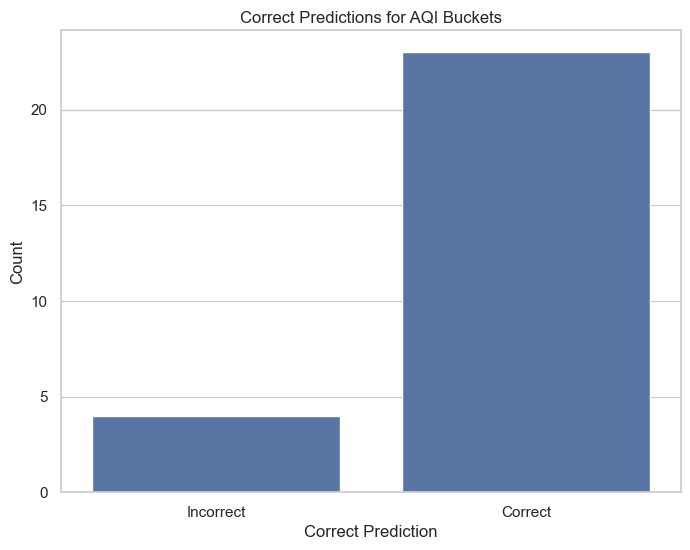

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# AQI_Bucket과 AQI_Predict 컬럼에서 실제 값과 예측 값을 가져옴
actual_aqi_bucket = test_data['AQI_Bucket']
predicted_aqi = test_data['AQI_Predict']

# 예측값과 실제 값 비교하여 일치하는지 확인
comparison_result = actual_aqi_bucket == predicted_aqi

# 각 AQI 버킷별로 맞춘 비율 계산
correct_counts = comparison_result.value_counts()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=correct_counts.index, y=correct_counts.values)
plt.title('Correct Predictions for AQI Buckets')
plt.xlabel('Correct Prediction')
plt.ylabel('Count')
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.show()


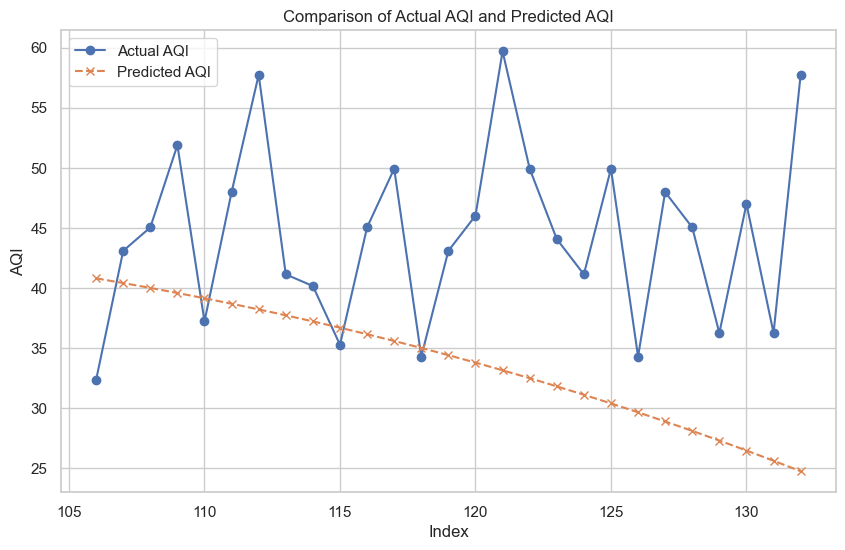

In [37]:
import matplotlib.pyplot as plt

# AQI와 predict 비교 Line Plot
plt.figure(figsize=(10, 6))

plt.plot(test_data['AQI'], label='Actual AQI', marker='o')
plt.plot(test_data['predict'], label='Predicted AQI', linestyle='dashed', marker='x')

plt.xlabel('Index')
plt.ylabel('AQI')
plt.title('Comparison of Actual AQI and Predicted AQI')
plt.legend()

plt.show()


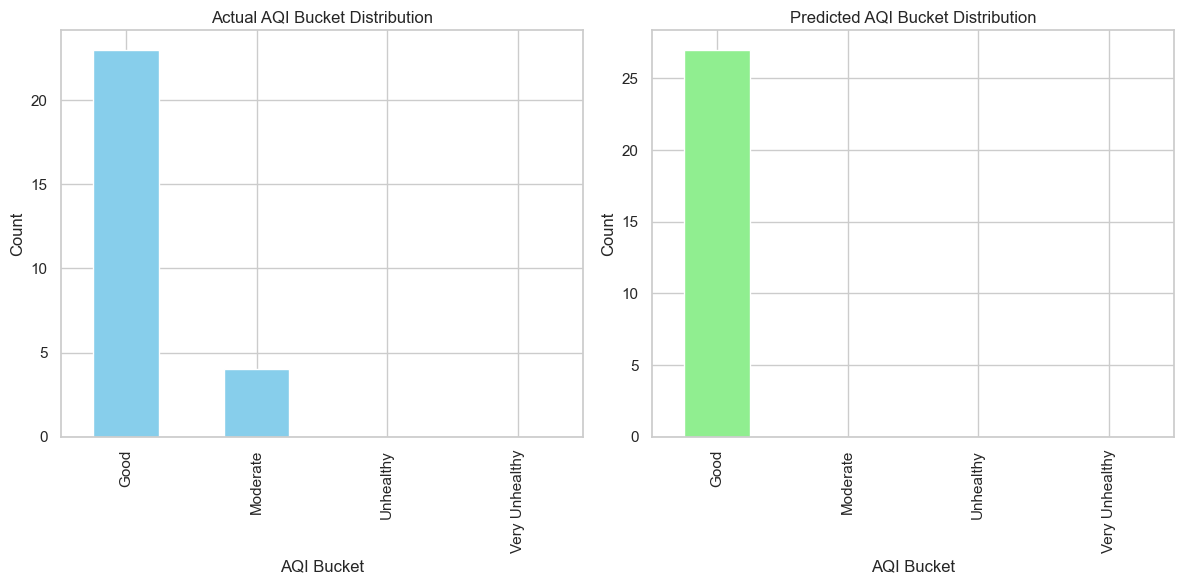

In [39]:
# AQI_Bucket 및 AQI_Predict 값 카운트
bucket_counts = test_data['AQI_Bucket'].value_counts()
predict_counts = test_data['AQI_Predict'].value_counts()

# 막대 그래프
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bucket_counts.plot(kind='bar', color='skyblue')
plt.title('Actual AQI Bucket Distribution')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
predict_counts.plot(kind='bar', color='lightgreen')
plt.title('Predicted AQI Bucket Distribution')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')

plt.tight_layout()
plt.show()